 
******************************************************************************
 
Welcome to the Multilayer Perceptron Neural Network
  trained using the backpropagation method.
Version 0.4, 03/05/2017, A.J. Maren
For comments, questions, or bug-fixes, contact: alianna.maren@northwestern.edu
 
This program learns to distinguish between broad classes of capital letters
It allows users to examine the hidden weights to identify learned features
 
******************************************************************************
 
 
  For the Grey Box 1 subnet, the number of nodes at each level are:
    Input: 9x9 (square array) =  81
    Hidden:  5
    Output:  10
  For the full multi-component network, the number of nodes at each level are:
    Input: 9x9 (square array) plus the GB 1 outputs = 81
    Hidden:  5
    Output:  10
 
 GB1inputArrayLength =  81
 GB1hiddenArrayLength =  5
 GB1outputArrayLength =  10
 inputArrayLength =  81
 hiddenArrayLength =  5
 outputArrayLength =  10
 gridSize

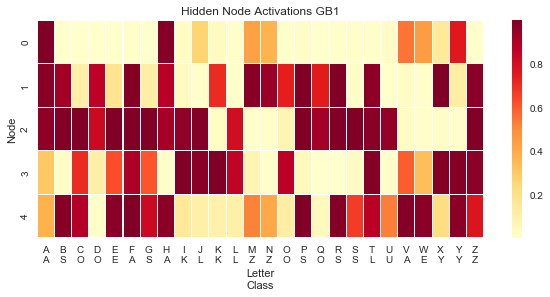



hiddenNodeActivationsListGB1




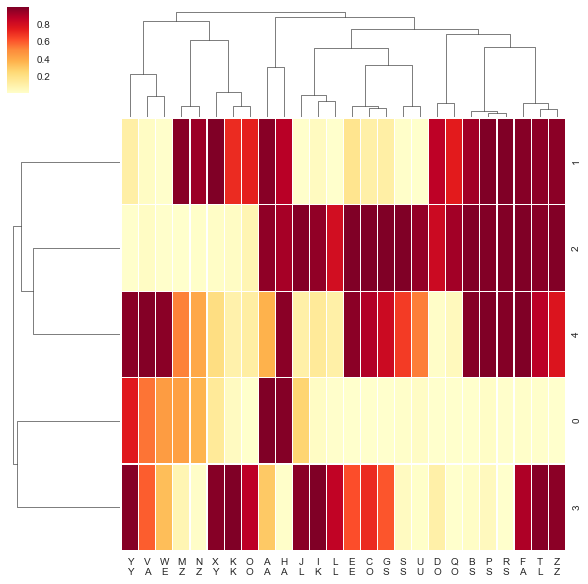



hiddenNodeActivationsListGB1




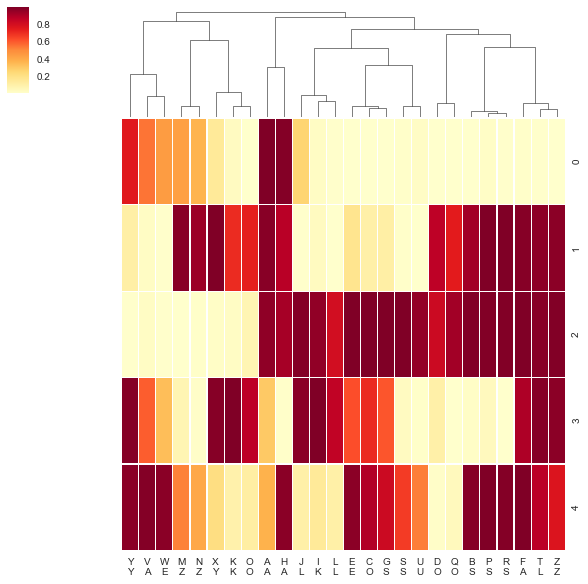

       A\nA      B\nS      C\nO      D\nO      E\nE      F\nA      G\nS  \
0  0.418693  0.190614  0.566148  0.118406  0.693797  0.189932  0.269997   
1  0.517516  0.045218  0.016467  0.004721  0.026586  0.055117  0.037889   
2  0.983414  0.710841  0.122621  0.494430  0.821409  0.821135  0.518313   
3  0.481785  0.171176  0.860757  0.538583  0.978426  0.842828  0.691962   
4  0.046112  0.002007  0.026044  0.024071  0.008874  0.120207  0.005722   

       H\nA      I\nK      J\nL    ...         Q\nO      R\nS      S\nS  \
0  0.740460  0.222495  0.480554    ...     0.335529  0.216879  0.886044   
1  0.115793  0.036950  0.672611    ...     0.001230  0.007081  0.017920   
2  0.951818  0.808237  0.940823    ...     0.400200  0.713298  0.993616   
3  0.325361  0.993276  0.746210    ...     0.345196  0.202951  0.996524   
4  0.135589  0.301587  0.029589    ...     0.041547  0.503060  0.003340   

       T\nL      U\nU      V\nA      W\nE      X\nY      Y\nY      Z\nZ  
0  0.046116  0.932519  0

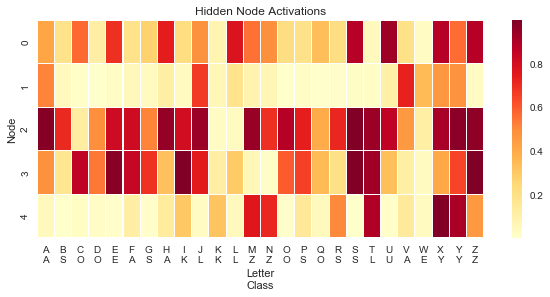



hiddenNodeActivationsList




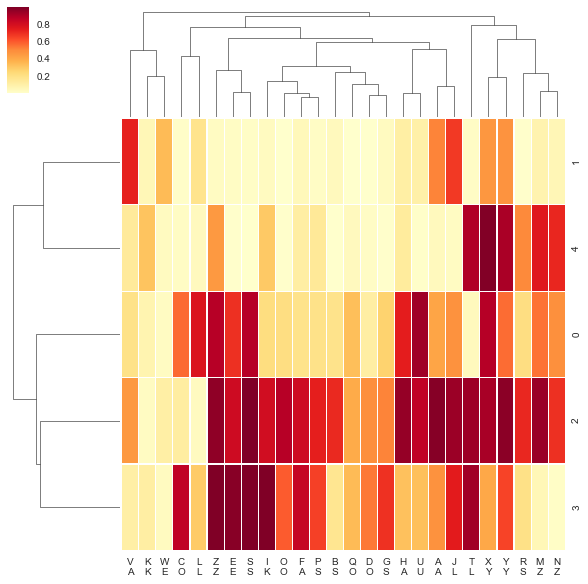



hiddenNodeActivationsList




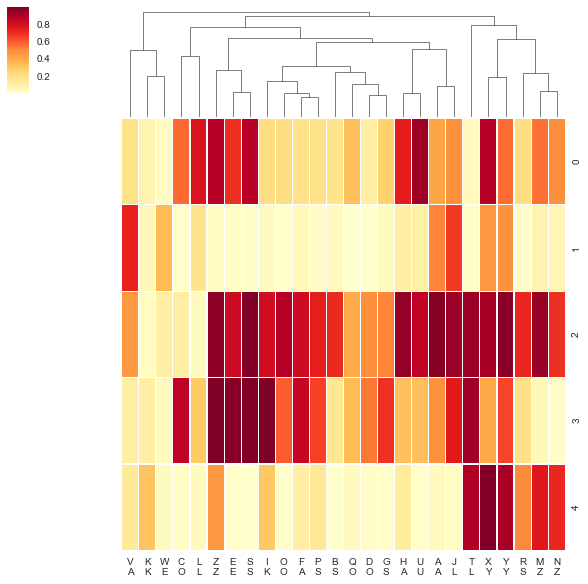


length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5

length of GB1hiddenArrayLength is:   5


length of GB1sumIntoHiddenArray is:   5
Out of while loop at iteration  10
 
  After training:

 the selected Training Data Set is  1

  Data Set Number 1  for letter  A  with letter number  0

length of GB1hiddenArrayLe

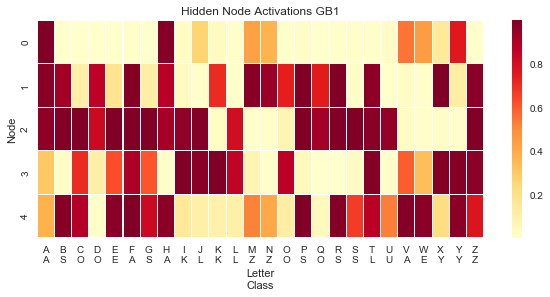



hiddenNodeActivationsListGB1




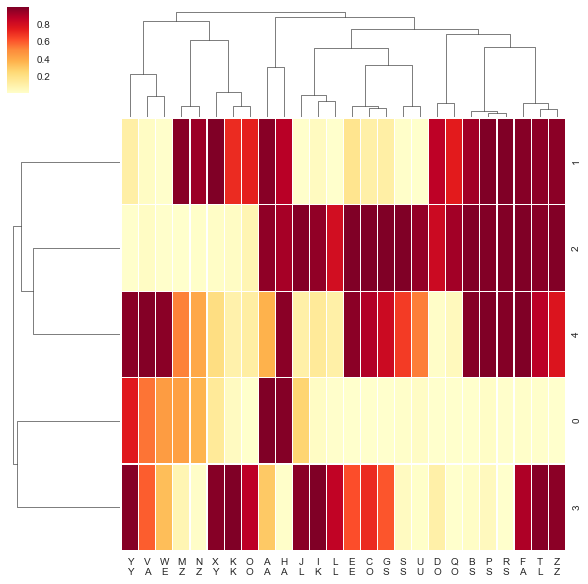



hiddenNodeActivationsListGB1




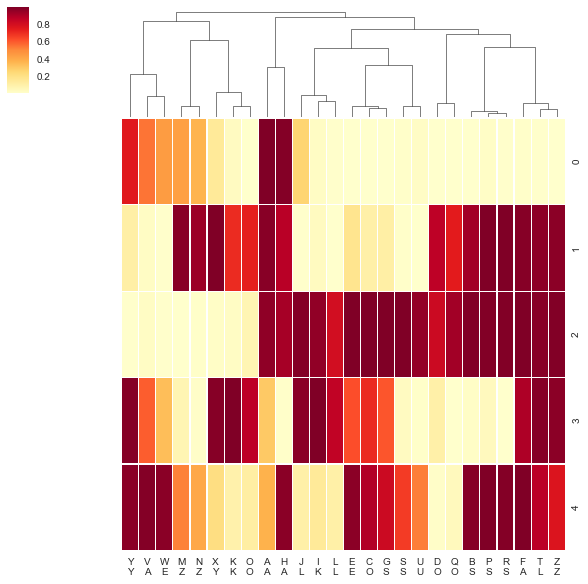

       A\nA      B\nS      C\nO      D\nO      E\nE      F\nA      G\nS  \
0  0.539801  0.227178  0.451287  0.086129  0.681590  0.208620  0.208962   
1  0.397777  0.012568  0.005929  0.001079  0.008975  0.025205  0.011067   
2  0.963813  0.305133  0.031080  0.152558  0.464861  0.587216  0.175848   
3  0.928167  0.896769  0.987037  0.967118  0.999228  0.986820  0.979314   
4  0.048426  0.001821  0.021601  0.020046  0.007592  0.113910  0.004846   

       H\nA      I\nK      J\nL    ...         Q\nO      R\nS      S\nS  \
0  0.785110  0.198369  0.515030    ...     0.238321  0.214574  0.891098   
1  0.041358  0.028632  0.547291    ...     0.000273  0.002562  0.006012   
2  0.873713  0.684735  0.911031    ...     0.098319  0.378484  0.968267   
3  0.905272  0.997263  0.915281    ...     0.940358  0.847467  0.999872   
4  0.136631  0.271961  0.029689    ...     0.034598  0.481471  0.002832   

       T\nL      U\nU      V\nA      W\nE      X\nY      Y\nY      Z\nZ  
0  0.041572  0.933811  0

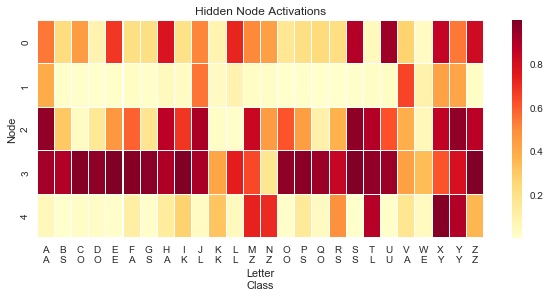



hiddenNodeActivationsList




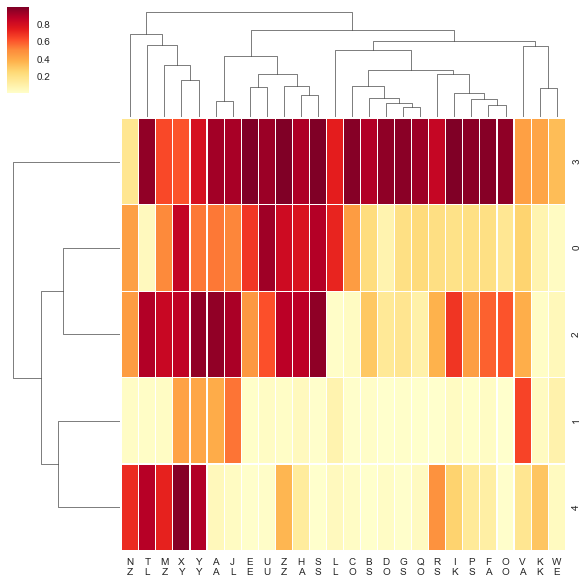



hiddenNodeActivationsList




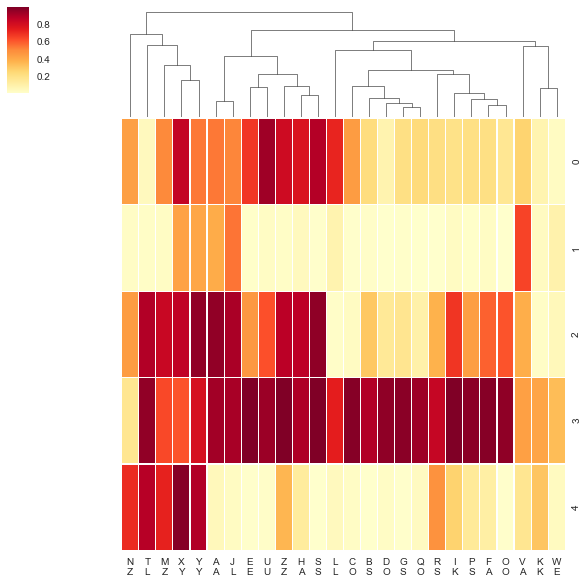

In [2]:
# -*- coding: utf-8 -*-
import random
from random import randint
from math import exp
import numpy as np
import copy
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) 


def welcome ():


    print(' ')
    print ('******************************************************************************')
    print(' ')
    print ('Welcome to the Multilayer Perceptron Neural Network')
    print ('  trained using the backpropagation method.')
    print ('Version 0.4, 03/05/2017, A.J. Maren')
    print ('For comments, questions, or bug-fixes, contact: alianna.maren@northwestern.edu')
    print (' ') 
    print ('This program learns to distinguish between broad classes of capital letters')
    print ('It allows users to examine the hidden weights to identify learned features')
    print(' ')
    print ('******************************************************************************')
    print(' ')
    return()

        
def computeTransferFnctn(summedNeuronInput, alpha):
    activation = 1.0 / (1.0 + exp(-alpha*summedNeuronInput)) 
    return activation
  

def computeTransferFnctnDeriv(NeuronOutput, alpha):
    return alpha*NeuronOutput*(1.0 -NeuronOutput)     


def matrixDotProduct (matrx1,matrx2):
    dotProduct = np.dot(matrx1,matrx2)
    
    return(dotProduct)    


def obtainNeuralNetworkSizeSpecs ():

    GB1numInputNodes = 81
    GB1numHiddenNodes = 5
    GB1numOutputNodes = 10   

    numInputNodes = 81
    numHiddenNodes = 5
    numOutputNodes = 10
          
    print (' ')
    print ('  For the Grey Box 1 subnet, the number of nodes at each level are:')
    print ('    Input: 9x9 (square array) = ', GB1numInputNodes)
    print ('    Hidden: ', GB1numHiddenNodes)
    print ('    Output: ', GB1numOutputNodes)

    print ('  For the full multi-component network, the number of nodes at each level are:')
    print ('    Input: 9x9 (square array) plus the GB 1 outputs =', numInputNodes)
    print ('    Hidden: ', numHiddenNodes)
    print ('    Output: ', numOutputNodes)           
                                    
    arraySizeList = (GB1numInputNodes, GB1numHiddenNodes, GB1numOutputNodes, numInputNodes, numHiddenNodes, numOutputNodes)
    
    return (arraySizeList)  



def InitializeWeight ():

    randomNum = random.random()
    weight=1-2*randomNum
           
    return (weight)  



def initializeWeightArray (weightArraySizeList):

    numLowerNodes = weightArraySizeList[0] 
    numUpperNodes = weightArraySizeList[1] 
    
  
    weightArray = np.zeros((numUpperNodes,numLowerNodes))    
    for row in range(numUpperNodes):  
        for col in range(numLowerNodes):  # number of columns in matrix 2
            weightArray[row,col] = InitializeWeight ()
            
    return (weightArray)  



def initializeBiasWeightArray (numBiasNodes):

    biasWeightArray = np.zeros(numBiasNodes)    
    for node in range(numBiasNodes):  
        biasWeightArray[node] = InitializeWeight ()
                  
    return (biasWeightArray)  


def obtainSelectedAlphabetTrainingValues (dataSet):
    
    # Insert training datasets for 9x9 letter classification
    trainingDataListA0 =  (1,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],0,'A',1,'A') # training data list 1 selected for the letter 'A'
    trainingDataListB0 =  (2,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],1,'B',8,'S') # training data list 2, letter 'E', courtesy AJM
    trainingDataListC0 =  (3,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],2,'C',6,'O') # training data list 3, letter 'C', courtesy PKVR
    trainingDataListD0 =  (4,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],3,'D',6,'O') # training data list 4, letter 'D', courtesy TD
    trainingDataListE0 =  (5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],4,'E',7,'E') # training data list 5, letter 'E', courtesy BMcD 
    trainingDataListF0 =  (6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],5,'F',1,'A') # training data list 6, letter 'F', courtesy SK
    trainingDataListG0 =  (7,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],6,'G',8,'S')
    trainingDataListH0 =  (8,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],7,'H',1,'A') # training data list 8, letter 'H', courtesy JC
    trainingDataListI0 =  (9,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],8,'I',5,'K') # training data list 9, letter 'I', courtesy GR
    trainingDataListJ0 = (10,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],9,'J',2,'L') # training data list 10 selected for the letter 'L', courtesy JT
    trainingDataListK0 = (11,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],10,'K',5,'K') # training data list 11 selected for the letter 'K', courtesy EO      
    trainingDataListL0 = (12,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],11,'L',2,'L') # training data list 12 selected for the letter 'L', courtesy PV
    trainingDataListM0 = (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,1,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],12,'M',4,'Z') # training data list 13 selected for the letter 'M', courtesy GR            
    trainingDataListN0 = (14,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],13,'N',4,'Z') # training data list 14 selected for the letter 'N'
    trainingDataListO0 = (15,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],14,'O',6,'O') # training data list 15, letter 'O', courtesy TD
    trainingDataListP0 = (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],15,'P',8,'S') # training data list 16, letter 'P', courtesy MT 
    trainingDataListQ0 = (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],16,'Q',6,'O') # training data list 17, letter 'Q', courtesy AJM (square corners)
    trainingDataListR0 = (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],17,'R',8,'S') # training data list 18, letter 'R', courtesy AJM (variant on 'P') 
    trainingDataListS0 = (19,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],18,'S',8,'S') # training data list 19, letter 'S', courtesy RG (square corners)
    trainingDataListT0 = (20,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],19,'T',2,'L') # training data list 20, letter 'T', courtesy JR
    trainingDataListU0 = (21,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],20,'U',9,'U') # training data list 21, letter 'U', courtesy JD
    trainingDataListV0 = (22,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0],21,'V',1,'A')																				
    trainingDataListW0 = (23,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,1,0,0,0,1,0,1, 0,1,0,0,0,0,0,1,0],22,'W',7,'E') # training data list 23, letter 'W', courtesy KW
    trainingDataListX0 = (24,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],23,'X',3,'Y') # training data list 24, letter 'X', courtesy JD
    trainingDataListY0 = (25,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],24,'Y',3,'Y')																				
    trainingDataListZ0 = (26,[1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,1,0,0, 0,0,0,0,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,0,0,0,0, 0,0,1,0,0,0,0,0,0, 0,1,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],25,'Z',4,'Z') # training data list 26, letter 'Z', courtesy ZW

    if dataSet == 1: trainingDataList = trainingDataListA0
    if dataSet == 2: trainingDataList = trainingDataListB0 
    if dataSet == 3: trainingDataList = trainingDataListC0
    if dataSet == 4: trainingDataList = trainingDataListD0     
    if dataSet == 5: trainingDataList = trainingDataListE0
    if dataSet == 6: trainingDataList = trainingDataListF0 
    if dataSet == 7: trainingDataList = trainingDataListG0 
    if dataSet == 8: trainingDataList = trainingDataListH0
    if dataSet == 9: trainingDataList = trainingDataListI0
    if dataSet == 10: trainingDataList = trainingDataListJ0    
    if dataSet == 11: trainingDataList = trainingDataListK0            
    if dataSet == 12: trainingDataList = trainingDataListL0
    if dataSet == 13: trainingDataList = trainingDataListM0
    if dataSet == 14: trainingDataList = trainingDataListN0 
    if dataSet == 15: trainingDataList = trainingDataListO0 
    if dataSet == 16: trainingDataList = trainingDataListP0   
    if dataSet == 17: trainingDataList = trainingDataListQ0
    if dataSet == 18: trainingDataList = trainingDataListR0 
    if dataSet == 19: trainingDataList = trainingDataListS0        
    if dataSet == 20: trainingDataList = trainingDataListT0
    if dataSet == 21: trainingDataList = trainingDataListU0
    if dataSet == 22: trainingDataList = trainingDataListV0
    if dataSet == 23: trainingDataList = trainingDataListW0
    if dataSet == 24: trainingDataList = trainingDataListX0
    if dataSet == 25: trainingDataList = trainingDataListY0
    if dataSet == 26: trainingDataList = trainingDataListZ0
    
    return (trainingDataList)
       


def obtainRandomAlphabetTrainingValues (numTrainingDataSets):

   
    dataSet = random.randint(0, numTrainingDataSets)
    
    # Insert training datasets for 9x9 letter classification
    trainingDataListA0 =  (1,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],0,'A',1,'A') # training data list 1 selected for the letter 'A'
    trainingDataListB0 =  (2,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],1,'B',8,'S') # training data list 2, letter 'E', courtesy AJM
    trainingDataListC0 =  (3,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],2,'C',6,'O') # training data list 3, letter 'C', courtesy PKVR
    trainingDataListD0 =  (4,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],3,'D',6,'O') # training data list 4, letter 'D', courtesy TD
    trainingDataListE0 =  (5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],4,'E',7,'E') # training data list 5, letter 'E', courtesy BMcD 
    trainingDataListF0 =  (6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],5,'F',1,'A') # training data list 6, letter 'F', courtesy SK
    trainingDataListG0 =  (7,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],6,'G',8,'S')
    trainingDataListH0 =  (8,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],7,'H',1,'A') # training data list 8, letter 'H', courtesy JC
    trainingDataListI0 =  (9,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],8,'I',5,'K') # training data list 9, letter 'I', courtesy GR
    trainingDataListJ0 = (10,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],9,'J',2,'L') # training data list 10 selected for the letter 'L', courtesy JT
    trainingDataListK0 = (11,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],10,'K',5,'K') # training data list 11 selected for the letter 'K', courtesy EO      
    trainingDataListL0 = (12,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],11,'L',2,'L') # training data list 12 selected for the letter 'L', courtesy PV
    trainingDataListM0 = (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,1,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],12,'M',4,'Z') # training data list 13 selected for the letter 'M', courtesy GR            
    trainingDataListN0 = (14,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],13,'N',4,'Z') # training data list 14 selected for the letter 'N'
    trainingDataListO0 = (15,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],14,'O',6,'O') # training data list 15, letter 'O', courtesy TD
    trainingDataListP0 = (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],15,'P',8,'S') # training data list 16, letter 'P', courtesy MT 
    trainingDataListQ0 = (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],16,'Q',6,'O') # training data list 17, letter 'Q', courtesy AJM (square corners)
    trainingDataListR0 = (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],17,'R',8,'S') # training data list 18, letter 'R', courtesy AJM (variant on 'P') 
    trainingDataListS0 = (19,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],18,'S',8,'S') # training data list 19, letter 'S', courtesy RG (square corners)
    trainingDataListT0 = (20,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],19,'T',2,'L') # training data list 20, letter 'T', courtesy JR
    trainingDataListU0 = (21,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],20,'U',9,'U') # training data list 21, letter 'U', courtesy JD
    trainingDataListV0 = (22,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0],21,'V',1,'A')																				
    trainingDataListW0 = (23,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,1,0,0,0,1,0,1, 0,1,0,0,0,0,0,1,0],22,'W',7,'E') # training data list 23, letter 'W', courtesy KW
    trainingDataListX0 = (24,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],23,'X',3,'Y') # training data list 24, letter 'X', courtesy JD
    trainingDataListY0 = (25,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],24,'Y',3,'Y')																				
    trainingDataListZ0 = (26,[1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,1,0,0, 0,0,0,0,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,0,0,0,0, 0,0,1,0,0,0,0,0,0, 0,1,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],25,'Z',4,'Z') # training data list 26, letter 'Z', courtesy ZW

    if dataSet == 1: trainingDataList = trainingDataListA0
    if dataSet == 2: trainingDataList = trainingDataListB0 
    if dataSet == 3: trainingDataList = trainingDataListC0
    if dataSet == 4: trainingDataList = trainingDataListD0     
    if dataSet == 5: trainingDataList = trainingDataListE0
    if dataSet == 6: trainingDataList = trainingDataListF0 
    if dataSet == 7: trainingDataList = trainingDataListG0 
    if dataSet == 8: trainingDataList = trainingDataListH0
    if dataSet == 9: trainingDataList = trainingDataListI0
    if dataSet == 10: trainingDataList = trainingDataListJ0    
    if dataSet == 11: trainingDataList = trainingDataListK0            
    if dataSet == 12: trainingDataList = trainingDataListL0
    if dataSet == 13: trainingDataList = trainingDataListM0
    if dataSet == 14: trainingDataList = trainingDataListN0 
    if dataSet == 15: trainingDataList = trainingDataListO0 
    if dataSet == 16: trainingDataList = trainingDataListP0   
    if dataSet == 17: trainingDataList = trainingDataListQ0
    if dataSet == 18: trainingDataList = trainingDataListR0 
    if dataSet == 19: trainingDataList = trainingDataListS0        
    if dataSet == 20: trainingDataList = trainingDataListT0
    if dataSet == 21: trainingDataList = trainingDataListU0
    if dataSet == 22: trainingDataList = trainingDataListV0
    if dataSet == 23: trainingDataList = trainingDataListW0
    if dataSet == 24: trainingDataList = trainingDataListX0
    if dataSet == 25: trainingDataList = trainingDataListY0
    if dataSet == 26: trainingDataList = trainingDataListZ0
      
    return (trainingDataList)



def ComputeGB1SingleFeedforwardPassFirstStep (alpha, GB1inputDataArray, GB1wWeightArray, GB1wBiasWeightArray):     
            
    GB1sumIntoHiddenArray = np.zeros(GB1hiddenArrayLength)    
    GB1hiddenArray = np.zeros(GB1hiddenArrayLength)  
    
    print()
    print('length of GB1hiddenArrayLength is:  ', GB1hiddenArrayLength)
    print()

    GB1sumIntoHiddenArray = matrixDotProduct (GB1wWeightArray,GB1inputDataArray)
    print()
    print('length of GB1sumIntoHiddenArray is:  ', len(GB1sumIntoHiddenArray))
    
    
    for node in range(GB1hiddenArrayLength):  
        GB1hiddenNodeSumInput=GB1sumIntoHiddenArray[node]+GB1wBiasWeightArray[node]
        GB1hiddenArray[node] = computeTransferFnctn(GB1hiddenNodeSumInput, alpha)

    return (GB1hiddenArray);
  


def ComputeGB1SingleFeedforwardPassSecondStep (alpha, GB1hiddenArray, GB1vWeightArray, GB1vBiasWeightArray):
    
    GB1sumIntoOutputArray = np.zeros(GB1hiddenArrayLength)    
    GB1outputArray = np.zeros(GB1outputArrayLength)   

    GB1sumIntoOutputArray = matrixDotProduct (GB1vWeightArray,GB1hiddenArray)
    
    for node in range(GB1outputArrayLength):  
        GB1outputNodeSumInput=GB1sumIntoOutputArray[node]+GB1vBiasWeightArray[node]
        GB1outputArray[node] = computeTransferFnctn(GB1outputNodeSumInput, alpha)
                                                                                                   
    return (GB1outputArray);
  


def ComputeSingleFeedforwardPassFirstStep (alpha, inputDataList, wWeightArray, biasHiddenWeightArray):
    
    sumIntoHiddenArray = np.zeros(hiddenArrayLength)    
    hiddenArray = np.zeros(hiddenArrayLength)   

    sumIntoHiddenArray = matrixDotProduct (wWeightArray,inputDataList)
    
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        hiddenNodeSumInput=sumIntoHiddenArray[node]+biasHiddenWeightArray[node]
        hiddenArray[node] = computeTransferFnctn(hiddenNodeSumInput, alpha)

    return (hiddenArray);
  

def ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray):
    
    sumIntoOutputArray = np.zeros(hiddenArrayLength)    
    outputArray = np.zeros(outputArrayLength)   

    sumIntoOutputArray = matrixDotProduct (vWeightArray,hiddenArray)
    
    for node in range(outputArrayLength):  #  Number of hidden nodes
        outputNodeSumInput=sumIntoOutputArray[node]+biasOutputWeightArray[node]
        outputArray[node] = computeTransferFnctn(outputNodeSumInput, alpha)
                                                                                                   
    return (outputArray);
  

def ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray, GB1wWeightArray, GB1wBiasWeightArray, 
GB1vWeightArray, GB1vBiasWeightArray):

    selectedTrainingDataSet = 1                              

    hiddenNodeActivationsListGB1 = []
    outputNodeActivationsListGB1 = []
    hiddenNodeActivationsList = []
    outputNodeActivationsList = []
 

    while selectedTrainingDataSet < numTrainingDataSets + 1: 
        print()
        print(" the selected Training Data Set is ", selectedTrainingDataSet)
        trainingDataList = obtainSelectedAlphabetTrainingValues (selectedTrainingDataSet)
        trainingDataInputList = trainingDataList[1]      

            
        GB1inputDataList = [] 
        GB1inputDataArray = np.zeros(GB1inputArrayLength) 
        
        for node in range(GB1inputArrayLength): 
            trainingData = trainingDataInputList[node]  
            GB1inputDataList.append(trainingData)
            GB1inputDataArray[node] = trainingData

        letterNumGB1 = trainingDataList[2]
        letterCharGB1 = trainingDataList[3]  
        print()
        print("  Data Set Number", selectedTrainingDataSet, " for letter ", letterCharGB1, " with letter number ", letterNumGB1) 


        GB1hiddenArray = ComputeGB1SingleFeedforwardPassFirstStep (alpha, GB1inputDataArray, GB1wWeightArray, GB1wBiasWeightArray)
        print()
        print(" The hidden node activations are: ")
        print(GB1hiddenArray)
        
        GB1outputArray = ComputeGB1SingleFeedforwardPassSecondStep (alpha, GB1hiddenArray, GB1vWeightArray, GB1vBiasWeightArray)                        
        print()
        print(" The output node activations are: ")
        print(GB1outputArray)
        
        hiddenNodeActivationsListGB1.append([letterCharGB1, letterNumGB1, trainingDataList[4], '\n'.join([letterCharGB1, trainingDataList[5]]), GB1hiddenArray])
        outputNodeActivationsListGB1.append([letterCharGB1, letterNumGB1, trainingDataList[4], '\n'.join([letterCharGB1, trainingDataList[5]]), GB1outputArray])
 
        
        inputDataList = [] 
        inputDataArray = np.zeros(inputArrayLength) 


        for node in range(GB1inputArrayLength): 
            trainingData = trainingDataInputList[node]  
            inputDataList.append(trainingData)
         
        for node in range(GB1outputArrayLength): 
            trainingData = GB1outputArray[node]  
            inputDataList.append(trainingData)

        for node in range(inputArrayLength): 
            inputDataArray[node] = inputDataList[node]            
        
        letterNum = trainingDataList[2] +1
        letterChar = trainingDataList[3]  
        print (' ')
        print ('  Data Set Number', selectedTrainingDataSet, ' for letter ', letterChar, ' with letter number ', letterNum) 

        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataArray, wWeightArray, biasHiddenWeightArray)

        print (' ')
        print (' The hidden node activations are:')
        print (hiddenArray)

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray)
    
        print (' ')
        print (' The output node activations are:')
        print (outputArray)   

        hiddenNodeActivationsList.append([letterChar, letterNum, trainingDataList[4], '\n'.join([letterChar, trainingDataList[5]]), hiddenArray])
        outputNodeActivationsList.append([letterChar, letterNum, trainingDataList[4], '\n'.join([letterChar, trainingDataList[5]]), outputArray])
 
        desiredOutputArray = np.zeros(outputArrayLength) # iniitalize the output array with 0's
        desiredClass = trainingDataList[4]                 # identify the desired class number
        print()
        print('Desired Class Number is:  ', desiredClass)
        print()
        desiredOutputArray[desiredClass] = 1                # set the desired output for that class to 1
     
        print (' ')
        print (' The desired output array values are: ')
        print (desiredOutputArray)  
       
                        
        errorArray = np.zeros(outputArrayLength) 
    
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

        print (' ')
        print (' The error values are:')
        print (errorArray)   
        
        print ('New SSE = %.6f' % newSSE) 
         
        selectedTrainingDataSet = selectedTrainingDataSet +1 

##########################################################################################################################     
    print("\n\nhiddenNodeActivationsListGB1")
    print("=========================\n\n")
    
    # pull out of list our data and prepare for heatmap
    df = pd.DataFrame([lst[4] for lst in hiddenNodeActivationsListGB1])
    df = df.transpose()
    df.columns = (x[3] for x in hiddenNodeActivationsListGB1)
    print(df)
    
    # hidden nodes heatmap
    print("\n\nhiddenNodeActivationsListGB1")
    print("=========================\n\n")
    sns.set(rc={'figure.figsize':(10.0,4.0)})
    ax = sns.heatmap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax.set_title('Hidden Node Activations GB1')
    ax.set_ylabel('Node')
    ax.set_xlabel('Letter\nClass')
    plt.show()
    
    # hidden nodes clustermap with row and column dendrogram
    print("\n\nhiddenNodeActivationsListGB1")
    print("=========================\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    plt.show()

    # hidden nodes clustermap with column dendrogram
    print("\n\nhiddenNodeActivationsListGB1")
    print("=========================\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white',row_cluster=False)
    plt.show()
##########################################################################################################################    
    # pull out of list our data and prepare for heatmap
    df1 = pd.DataFrame([lst[4] for lst in hiddenNodeActivationsList])
    df1 = df1.transpose()
    df1.columns = (x[3] for x in hiddenNodeActivationsList)
    print(df1)
    
    # hidden nodes heatmap
    print("\n\nhiddenNodeActivationsList")
    print("=========================\n\n")
    sns.set(rc={'figure.figsize':(10.0,4.0)})
    ax1 = sns.heatmap(df1,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax1.set_title('Hidden Node Activations')
    ax1.set_ylabel('Node')
    ax1.set_xlabel('Letter\nClass')
    plt.show()
    
    # hidden nodes clustermap with row and column dendrogram
    print("\n\nhiddenNodeActivationsList")
    print("=========================\n\n")
    ax1 = sns.clustermap(df1,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    plt.show()

    # hidden nodes clustermap with column dendrogram
    print("\n\nhiddenNodeActivationsList")
    print("=========================\n\n")
    ax1 = sns.clustermap(df1,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white',row_cluster=False)
    plt.show()
##########################################################################################################################    

def backpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray):


    hiddenArrayLength = arraySizeList [4]
    outputArrayLength = arraySizeList [5]

    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 
                 
    deltaVWtArray = np.zeros((outputArrayLength, hiddenArrayLength))  # initialize an array for the deltas
    newVWeightArray = np.zeros((outputArrayLength, hiddenArrayLength)) # initialize an array for the new hidden weights
        
    for row in range(outputArrayLength):  #  Number of rows in weightMatrix
        for col in range(hiddenArrayLength):
            partialSSE_w_V_Wt = -errorArray[row]*transferFuncDerivArray[row]*hiddenArray[col]
            deltaVWtArray[row,col] = -eta*partialSSE_w_V_Wt
            newVWeightArray[row,col] = vWeightArray[row,col] + deltaVWtArray[row,col]                                                                                                                                                
                                                                                                                                                                                                            
    return (newVWeightArray);     

            
def backpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray):


    outputArrayLength = arraySizeList [5]

    deltaBiasOutputArray = np.zeros(outputArrayLength)  # initialize an array for the deltas
    newBiasOutputWeightArray = np.zeros(outputArrayLength) # initialize an array for the new output bias weights
    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 

    for node in range(outputArrayLength):  #  Number of nodes in output array (same as number of output bias nodes)    
        partialSSE_w_BiasOutput = -errorArray[node]*transferFuncDerivArray[node]
        deltaBiasOutputArray[node] = -eta*partialSSE_w_BiasOutput  
        newBiasOutputWeightArray[node] =  biasOutputWeightArray[node] + deltaBiasOutputArray[node]           
   
                                                                                                                                      
    return (newBiasOutputWeightArray);     


def backpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):


    inputArrayLength = arraySizeList [3]
    hiddenArrayLength = arraySizeList [4]
    outputArrayLength = arraySizeList [5]              
                                          
 
    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)    # initialize an array for the transfer function deriv 
      
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)
        
    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array
      
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha)
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]
        
    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = weightedErrorArray[hiddenNode] \
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode]
             
    deltaWWtArray = np.zeros((hiddenArrayLength, inputArrayLength))  # initialize an array for the deltas
    newWWeightArray = np.zeros((hiddenArrayLength, inputArrayLength)) # initialize an array for the new input-to-hidden weights
        
    for row in range(hiddenArrayLength):  #  Number of rows in input-to-hidden weightMatrix
        
        for col in range(inputArrayLength):  # number of columns in weightMatrix
            partialSSE_w_W_Wts = -transferFuncDerivHiddenArray[row]*inputArray[col]*weightedErrorArray[row]
            deltaWWtArray[row,col] = -eta*partialSSE_w_W_Wts
            newWWeightArray[row,col] = wWeightArray[row,col] + deltaWWtArray[row,col]                                                                                         
                                                                    
    return (newWWeightArray);     
    
            
def backpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):


    inputArrayLength = arraySizeList [3]
    hiddenArrayLength = arraySizeList [4]
    outputArrayLength = arraySizeList [5]              
                                                       

    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array    
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array    

    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)  # initialize an array for the transfer function deriv 
    partialSSE_w_BiasHidden      = np.zeros(hiddenArrayLength)  # initialize an array for the partial derivative of the SSE
    deltaBiasHiddenArray         = np.zeros(hiddenArrayLength)  # initialize an array for the deltas
    newBiasHiddenWeightArray     = np.zeros(hiddenArrayLength)  # initialize an array for the new hidden bias weights
          
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)      
                  
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha) 
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]

    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = weightedErrorArray[hiddenNode]
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode]
            

    for hiddenNode in range(hiddenArrayLength):  #  Number of rows in input-to-hidden weightMatrix           
        partialSSE_w_BiasHidden[hiddenNode] = -transferFuncDerivHiddenArray[hiddenNode]*weightedErrorArray[hiddenNode]
        deltaBiasHiddenArray[hiddenNode] = -eta*partialSSE_w_BiasHidden[hiddenNode]
        newBiasHiddenWeightArray[hiddenNode] = biasHiddenWeightArray[hiddenNode] + deltaBiasHiddenArray[hiddenNode]                                                                                                                                                                                                                                                         
  
                                                                                                                                            
    return (newBiasHiddenWeightArray); 

def expandLetterBoundaries (trainingDataList):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    pixelArray = trainingDataList[1]


    expandedLetterArray = np.zeros(shape=(eGH,eGW)) 

    iterAcrossRow = 0
    iterOverAllRows = 0



    iterAcrossRow = 0
    while iterAcrossRow < eGW:
        expandedLetterArray[iterOverAllRows,iterAcrossRow] = 0  
        iterAcrossRow = iterAcrossRow + 1

    rowVal = 1
    while rowVal <eGH-1:

        iterAcrossRow = 0
        expandedLetterArray[iterOverAllRows,iterAcrossRow] = 0
        
        iterAcrossRow = 1       
        while iterAcrossRow < eGW-1:
            expandedLetterArray[rowVal,iterAcrossRow] = 0
            
            if pixelArray[iterAcrossRow-1+(rowVal-1)*gridWidth] > 0.9: 
                expandedLetterArray[rowVal,iterAcrossRow] = 1
            iterAcrossRow = iterAcrossRow +1
        iterAcrossRow = 0  #re-initialize iteration count  
        rowVal = rowVal +1
      
    rowVal = eGH-1
    iterAcrossRow = 0
    while iterAcrossRow < eGW-1:
        expandedLetterArray[rowVal,iterAcrossRow] = 0  
        iterAcrossRow = iterAcrossRow + 1      
      
    return expandedLetterArray


def printLetter (trainingDataList):    

    print (' ')
    print (' in procedure printLetter')
    print (' ')                         
    print ('The training data set is ', trainingDataList[0])
    print ('The data set is for the letter', trainingDataList[3], ', which is alphabet number ', trainingDataList[2])

    if trainingDataList[0] > 25: print('This is a variant pattern for letter ', trainingDataList[3])

    pixelArray = trainingDataList[1]
                
    iterAcrossRow = 0
    iterOverAllRows = 0
    while iterOverAllRows <gridHeight:
        while iterAcrossRow < gridWidth:

            iterAcrossRow = iterAcrossRow+1
        iterOverAllRows = iterOverAllRows + 1
        iterAcrossRow = 0 #re-initialize so the row-print can begin again
    
    return         
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

def printExpandedLetter (expandedLetterArray):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    print (' The expanded letter is:')
    print (expandedLetterArray)   
        
           
    return


def mask1LetterFunc(expandedLetterArray):

    
    mask1LetterArray = np.zeros(shape=(gridHeight,gridWidth))
    
   
    rowVal = 1
    colVal = 1
        
    
    while rowVal <gridHeight+1: 

        arrayRow = rowVal - 1 

        while colVal <gridWidth+1:           
            e0 =  expandedLetterArray[rowVal-1, colVal-1]
            e1 =  expandedLetterArray[rowVal-1, colVal]
            e2 =  expandedLetterArray[rowVal-1, colVal+1]   
            e3 =  expandedLetterArray[rowVal, colVal-1]
            e4 =  expandedLetterArray[rowVal, colVal]
            e5 =  expandedLetterArray[rowVal, colVal+1]   
            e6 =  expandedLetterArray[rowVal+1, colVal-1]
            e7 =  expandedLetterArray[rowVal+1, colVal]
            e8 =  expandedLetterArray[rowVal+1, colVal+1]               
              
            mask1ArrayVal    =  (e0*mask1[0] + e1*mask1[1] + e2*mask1[2] + 
                                e3*mask1[3] + e4*mask1[4] + e5*mask1[5] + 
                                e6*mask1[6] + e7*mask1[7] + e8*mask1[8] ) / 3.0                        
                         
            arrayCol = colVal - 1

            mask1LetterArray[arrayRow,arrayCol] = mask1ArrayVal 
            colVal = colVal + 1

        rowVal = rowVal + 1
        colVal = 1             
                        
                                        
    return mask1LetterArray 
    

def convertArrayToList(mask1LetterArray):

    mask1LetterList = list()

    for row in range(gridHeight):  #  Number of rows in a masked input grid
        for col in range(gridWidth):  # number of columns in a masked input grid
            localGridElement = mask1LetterArray[row,col] 
            mask1LetterList.append(localGridElement)   

    return (mask1LetterList)
    
def readGB1wWeightFile (): 

    GB1wWeightList = list()
    with open('C:/Users/crmo/AI 458/GB1wWeightFile.csv', "r") as infile:

        reader = csv.reader(infile)
        for row in reader:
            colnum = 0
            theRow = row
            for col in row:
                data = float(theRow[colnum])
            GB1wWeightList.append(data)
    print (' ')
    print (' Reading the GB1wWeights weights back from the file:')
    print()
    print('readGB1wWeightFile function:')
    print()
    print('Length of GB1wWeightList is: ', len(GB1wWeightList))
    return GB1wWeightList                                                  


def readGB1vWeightFile (): 

    GB1vWeightList = list()
    with open('C:/Users/crmo/AI 458/GB1vWeightFile.csv', "r") as infile:

        reader = csv.reader(infile)
        for row in reader:
            colnum = 0
            theRow = row
            for col in row:
                data = float(theRow[colnum])
            GB1vWeightList.append(data)
        
    return GB1vWeightList                                                  

def reconstructGB1wWeightArray (GB1wWeightList):

    numUpperNodes = GB1hiddenArrayLength
    numLowerNodes = GB1inputArrayLength 
    
    GB1wWeightArray = np.zeros((numUpperNodes,numLowerNodes))    # initialize the weight matrix with 0's     


    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        
        for col in range(numLowerNodes):  # number of columns in matrix 2
            localPosition = row*numLowerNodes + col            
            localWeight = GB1wWeightList[localPosition]
            GB1wWeightArray[row,col] = localWeight
    print (' ')
    print (' In reconstructWeightArray')
    print()
    print('Length of GB1wWeightArray is: ', len(GB1wWeightArray))
                                                     
    return GB1wWeightArray  


def reconstructGB1vWeightArray (GB1vWeightList):

    numUpperNodes = GB1outputArrayLength
    numLowerNodes = GB1hiddenArrayLength 
    
    GB1vWeightArray = np.zeros((numUpperNodes,numLowerNodes))    # iniitalize the weight matrix with 0's     
  
    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        
        for col in range(numLowerNodes):  # number of columns in matrix 2
            localPosition = row*numLowerNodes + col
            localWeight = GB1vWeightList[localPosition]
            GB1vWeightArray[row,col] = localWeight
                                                     
    return GB1vWeightArray  
    
def readGB1wBiasWeightFile (): 

    GB1wBiasWeightList = list()
    with open('C:/Users/crmo/AI 458/GB1wBiasWeightFile.csv', "r") as infile:

        reader = csv.reader(infile)
        for row in reader:
            colnum = 0
            theRow = row
            for col in row:
                data = float(theRow[colnum])
            GB1wBiasWeightList.append(data)
    print (' ')
    print (' Reading the GB1wBiasWeight bias weights back from the file:')
    print()
    print('Length of GB1wBiasWeightList is: ', len(GB1wBiasWeightList))
    return GB1wBiasWeightList                                                  


def readGB1vBiasWeightFile (): 

    GB1vBiasWeightList = list()
    with open('C:/Users/crmo/AI 458/GB1vBiasWeightFile.csv', "r") as infile:

        reader = csv.reader(infile)
        for row in reader:
            colnum = 0
            theRow = row
            for col in row:
                data = float(theRow[colnum])
            GB1vBiasWeightList.append(data)
     
    return GB1vBiasWeightList                                                  

def reconstructGB1wBiasWeightArray (GB1wBiasWeightList):

    GB1wBiasWeightArray = np.zeros(GB1hiddenArrayLength)    # initialize the weight matrix with 0's     

    print(' ')
    print (' in reconstructGB1wWeightArray')  
    for node in range(GB1hiddenArrayLength):  #  Number of hidden bias nodes          
            localWeight = GB1wBiasWeightList[node]
            GB1wBiasWeightArray[node] = localWeight
    print (' ')
    print (' In reconstructGB1wBiasWeightArray') 
    print()
    print('The length of GB1wBiasWeightArray is:  ',len(GB1wBiasWeightArray))
    print()
    print (' The recovered hidden bias weight matrix is: ')
    print()
    print (GB1wBiasWeightArray)
                                                     
    return GB1wBiasWeightArray  


def reconstructGB1vBiasWeightArray (GB1vBiasWeightList):
    
    GB1vBiasWeightArray = np.zeros(GB1outputArrayLength)    # iniitalize the weight matrix with 0's     
  
    for node in range(GB1outputArrayLength):  #  Number of output bias nodes
            localWeight = GB1vBiasWeightList[node]
            GB1vBiasWeightArray[node] = localWeight
                                                   
    return GB1vBiasWeightArray  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              


def main():

    global inputArrayLength
    global hiddenArrayLength
    global outputArrayLength
    global GB1inputArrayLength
    global GB1hiddenArrayLength
    global GB1outputArrayLength    
    global gridWidth
    global gridHeight
    global eGH # expandedGridHeight, defined in function expandLetterBoundaries 
    global eGW # expandedGridWidth defined in function expandLetterBoundaries 
    global mask1    


    welcome()

    
    arraySizeList = list() # empty list

    arraySizeList = obtainNeuralNetworkSizeSpecs ()
    

    GB1inputArrayLength = arraySizeList [0] 
    GB1hiddenArrayLength = arraySizeList [1] 
    GB1outputArrayLength = arraySizeList [2] 
    inputArrayLength = arraySizeList [3] 
    hiddenArrayLength = arraySizeList [4] 
    outputArrayLength = arraySizeList [5]     
    
    print (' ')
    print (' GB1inputArrayLength = ', GB1inputArrayLength)
    print (' GB1hiddenArrayLength = ', GB1hiddenArrayLength)
    print (' GB1outputArrayLength = ', GB1outputArrayLength) 
    print (' inputArrayLength = ', inputArrayLength)
    print (' hiddenArrayLength = ', hiddenArrayLength)
    print (' outputArrayLength = ', outputArrayLength)        

    gridSizeFloat = (inputArrayLength+1)**(1/2.0) # convert back to the total number of nodes
    gridSize = int(gridSizeFloat+0.1) # add a smidge before converting to integer

    print (' gridSize = ', gridSize)


    gridWidth = gridSize
    gridHeight = gridSize
    expandedGridHeight = gridHeight+2
    expandedGridWidth = gridWidth+2 
    eGH = expandedGridHeight
    eGW = expandedGridWidth       

    mask1 = (0,1,0,0,1,0,0,1,0)        

    alpha = 1.0
    eta = 1    
    maxNumIterations = 10    # temporarily set to 10 for testing
    epsilon = 0.01
    iteration = 0
    SSE = 0.0
    numTrainingDataSets = 26

    GB1wWeightList = readGB1wWeightFile()
    
    GB1wWeightArray = reconstructGB1wWeightArray (GB1wWeightList) 
    
    GB1vWeightList = readGB1vWeightFile()
    
    GB1vWeightArray = reconstructGB1vWeightArray (GB1vWeightList) 
    
    GB1wBiasWeightList = readGB1wBiasWeightFile()
    
    GB1wBiasWeightArray = reconstructGB1wBiasWeightArray (GB1wBiasWeightList) 
    
    GB1vBiasWeightList = readGB1vBiasWeightFile()
    
    GB1vBiasWeightArray = reconstructGB1vBiasWeightArray (GB1vBiasWeightList) 


    wWeightArraySizeList = (inputArrayLength, hiddenArrayLength)
    vWeightArraySizeList = (hiddenArrayLength, outputArrayLength)
    biasHiddenWeightArraySize = hiddenArrayLength
    biasOutputWeightArraySize = outputArrayLength        

    print (' ')
    print (' about to call initializeWeightArray for the w weights')
    print (' the number of lower and upper nodes is ', wWeightArraySizeList) 
    wWeightArray = initializeWeightArray (wWeightArraySizeList)
    print (' about to call initializeWeightArray for the v weights')
    print (' the number of lower and upper nodes is ', vWeightArraySizeList)     
    vWeightArray = initializeWeightArray (vWeightArraySizeList)

    biasHiddenWeightArray = initializeBiasWeightArray (biasHiddenWeightArraySize)
    biasOutputWeightArray = initializeBiasWeightArray (biasOutputWeightArraySize) 

                     
    print (' ')
    print ('  Before training:')
    
    ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, biasHiddenWeightArray, 
    vWeightArray, biasOutputWeightArray, GB1wWeightArray, GB1wBiasWeightArray, GB1vWeightArray, GB1vBiasWeightArray)                                                                  

    while iteration < maxNumIterations:           

        iteration = iteration +1

        trainingDataList = (0,[0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0],0,' ',0,' ')        
                                                                                  
        dataSet = random.randint(1, numTrainingDataSets)
        
        trainingDataList = obtainSelectedAlphabetTrainingValues (dataSet)  
               
                
        GB1inputDataList = []      
        GB1inputDataArray =  np.zeros(GB1inputArrayLength)
        
        thisTrainingDataList = list()                                                                            
        thisTrainingDataList = trainingDataList[1]
        for node in range(GB1inputArrayLength): 
            trainingData = thisTrainingDataList[node]
            GB1inputDataList.append(trainingData)
    

        GB1desiredOutputArray = np.zeros(GB1outputArrayLength)    # iniitalize the output array with 0's
        GB1desiredClass = trainingDataList[4]                 # identify the desired class
        GB1desiredOutputArray[GB1desiredClass] = 1                # set the desired output for that class to 1 

        GB1hiddenArray = ComputeGB1SingleFeedforwardPassFirstStep (alpha, GB1inputDataArray, GB1wWeightArray, GB1wBiasWeightArray)
    
        GB1outputArray = ComputeGB1SingleFeedforwardPassSecondStep (alpha, GB1hiddenArray,GB1vWeightArray, GB1vBiasWeightArray)
    

        expandedLetterArray = list()
        expandedLetterArray = expandLetterBoundaries (trainingDataList)
    
        mask1LetterArray = mask1LetterFunc(expandedLetterArray)
        mask1LetterList = convertArrayToList(mask1LetterArray)
                 
          
        inputDataList = [] 
        inputDataArray = np.zeros(inputArrayLength) 


        inputDataList = []      
        inputDataArray =  np.zeros(inputArrayLength)
        
        thisTrainingDataList = list()                                                                            
        thisTrainingDataList = trainingDataList[1]    # the 81 input array    
        for node in range(GB1inputArrayLength):         # this should be length 81
            trainingData = thisTrainingDataList[node]  
            inputDataList.append(trainingData)
      
        for node in range(GB1outputArrayLength):  # this should be equal to the number of classes used
            trainingData = GB1outputArray[node]  # this should be the weights saved at the output level from GB1
            inputDataList.append(trainingData)    # appending GB1 output weights to the list of original inputs directly above

        for node in range(inputArrayLength):  # defined as number of original inputs plus number of outputs from GB1
            inputDataArray[node] = inputDataList[node]            
 

        desiredOutputArray = np.zeros(outputArrayLength)    # iniitalize the output array with 0's
        desiredClass = trainingDataList[4]                 # identify the desired class number
        desiredOutputArray[desiredClass] = 1                                       
          
                                                                                                      
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataArray, wWeightArray, biasHiddenWeightArray)
    
        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray,vWeightArray, biasOutputWeightArray)

        errorArray = np.zeros(outputArrayLength) 
    
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

  
        newVWeightArray = backpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray)
        newBiasOutputWeightArray = backpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray) 

        newWWeightArray = backpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)

        newBiasHiddenWeightArray = backpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)  
    
                    
        vWeightArray = newVWeightArray[:]
    
        biasOutputWeightArray = newBiasOutputWeightArray[:]
    
        wWeightArray = newWWeightArray[:]  
    
        biasHiddenWeightArray = newBiasHiddenWeightArray[:] 
                                                                                                                                     
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataArray, wWeightArray, biasHiddenWeightArray)

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray)

        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        


        if newSSE < epsilon:

            
            break
    print ('Out of while loop at iteration ', iteration) 
    

    print (' ')
    print ('  After training:')                  
                                                      
    ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray, GB1wWeightArray, GB1wBiasWeightArray, 
GB1vWeightArray, GB1vBiasWeightArray) 
            
    
if __name__ == "__main__": main()